<a href="https://colab.research.google.com/github/Thachhcmute3001/AI/blob/main/Skin_Disease_Detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [64]:
from os import listdir
from numpy import asarray, save
from keras.utils import load_img
from keras.utils import img_to_array
import numpy as np
from sklearn.model_selection import train_test_split
from keras.datasets import cifar100
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Normalization
from keras.models import Sequential, Model
from keras import Input
from keras.layers import LeakyReLU
from keras.optimizers import Adam

In [65]:
from numpy import asarray

folder = '/content/drive/MyDrive/Final_Project/Dataset/'
photos, labels = list(), list()
for file in listdir(folder):
  output = 0.0
  if file.startswith('diung'):
    output = 0
  if file.startswith('ezema'):
    output = 1
  if file.startswith('muncoc'):
    output = 2
  if file.startswith('namda'):
    output = 3
  if file.startswith('suimao'):
    output = 4
  if file.startswith('ungthuda'):
    output = 5
  if file.startswith('vaynen'):
    output = 6
  photo = load_img(folder + file, target_size=(80, 80))
  photo = img_to_array(photo)
  photos.append(photo)
  labels.append(output)

photos = asarray(photos)
labels = asarray(labels)
print(photos.shape, labels.shape)
save('/content/drive/MyDrive/Final_Project/Lesson/Disease_photos.npy', photos)
save('/content/drive/MyDrive/Final_Project/Lesson/Disease_labels.npy', labels)

(6464, 80, 80, 3) (6464,)


In [66]:
# Load images and labels
from keras.utils import to_categorical #one hot encoding
import numpy as np
photos = np.load('/content/drive/MyDrive/Final_Project/Lesson/Disease_photos.npy')
labels = np.load('/content/drive/MyDrive/Final_Project/Lesson/Disease_labels.npy')
labels_one_hot = to_categorical(labels)
x_train, x_test, y_train, y_test = train_test_split(photos, labels_one_hot, test_size = 0.3, random_state = 100)
print(y_train.shape)

(4524, 7)


In [67]:
model = Sequential()
#Convolutional
model.add(Conv2D(64, kernel_size= (3,3), activation= 'relu', input_shape = (80,80,3), padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(128, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(256, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(256, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

model.add(Conv2D(512, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(Conv2D(512, kernel_size= (3,3), activation= 'relu', padding= 'same'))
model.add(MaxPooling2D((2,2), padding= 'same'))

# Fully connected layers
model.add(Flatten())
model.add(Dense(1024, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1024, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(7, activation= 'softmax'))
model.compile(loss='categorical_crossentropy', optimizer = Adam(), metrics=['accuracy'])
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 80, 80, 64)        1792      
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 40, 40, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 40, 40, 128)       73856     
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 20, 20, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 20, 20, 256)       295168    
                                                                 
 conv2d_27 (Conv2D)          (None, 20, 20, 256)      

In [26]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Final_Project/Model/Disease.h5')

In [68]:
train = model.fit(x_train, y_train, batch_size = 64,
                               epochs = 30)

Epoch 1/30
71/71 [==============================] - 9s 75ms/step - loss: 4.3091 - accuracy: 0.2003
Epoch 2/30
71/71 [==============================] - 4s 54ms/step - loss: 1.8256 - accuracy: 0.2401
Epoch 3/30
71/71 [==============================] - 4s 56ms/step - loss: 1.7588 - accuracy: 0.2779
Epoch 4/30
71/71 [==============================] - 4s 54ms/step - loss: 1.6178 - accuracy: 0.3455
Epoch 5/30
71/71 [==============================] - 4s 54ms/step - loss: 1.5581 - accuracy: 0.3888
Epoch 6/30
71/71 [==============================] - 4s 55ms/step - loss: 1.3672 - accuracy: 0.4817
Epoch 7/30
71/71 [==============================] - 4s 56ms/step - loss: 1.1791 - accuracy: 0.5608
Epoch 8/30
71/71 [==============================] - 4s 55ms/step - loss: 1.0247 - accuracy: 0.6194
Epoch 9/30
71/71 [==============================] - 4s 55ms/step - loss: 0.9090 - accuracy: 0.6768
Epoch 10/30
71/71 [==============================] - 4s 56ms/step - loss: 0.8142 - accuracy: 0.7078
Epoch 11/

In [69]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print("Accuracy:", test_acc)
print('Loss:', test_loss)

61/61 [==============================] - 2s 16ms/step - loss: 0.7324 - accuracy: 0.8557
Accuracy: 0.8556700944900513
Loss: 0.7323756217956543


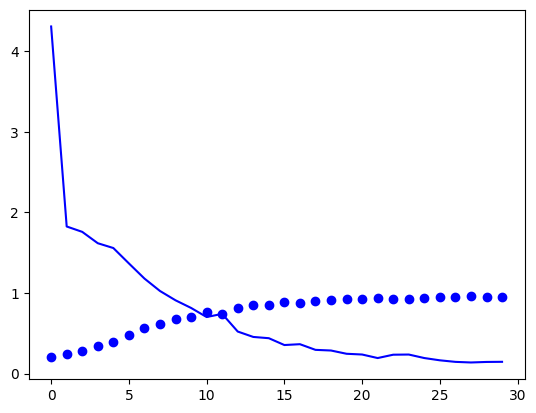

In [70]:
accuracy = train.history['accuracy']
loss = train.history['loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, loss, 'b', label = 'Traning loss')
plt.show()

In [71]:
#Save model
model.save('/content/drive/MyDrive/Final_Project/Model/Disease.h5')

In [72]:
from keras.models import load_model
model = load_model('/content/drive/MyDrive/Final_Project/Model/Disease.h5')

1/1 [==============================] - 0s 18ms/step
Mun coc


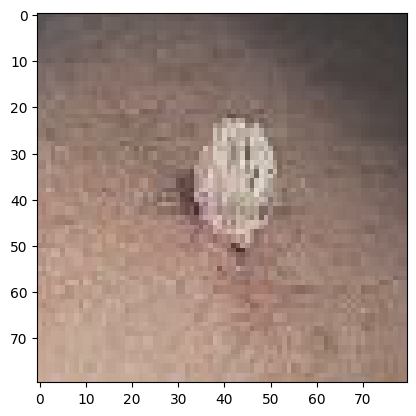

1/1 [==============================] - 0s 19ms/step
Mun coc


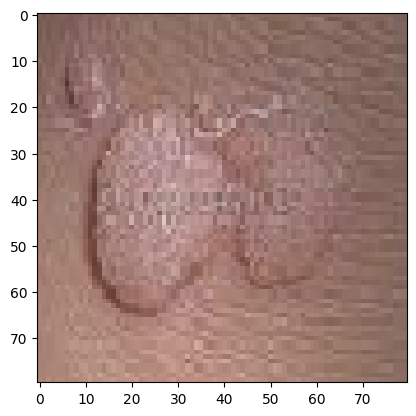

1/1 [==============================] - 0s 19ms/step
Mun coc


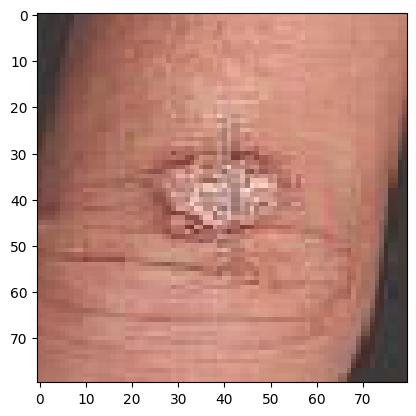

1/1 [==============================] - 0s 19ms/step
Sui mao


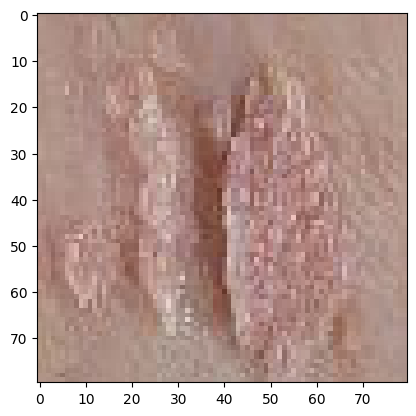

1/1 [==============================] - 0s 19ms/step
Ung thu da


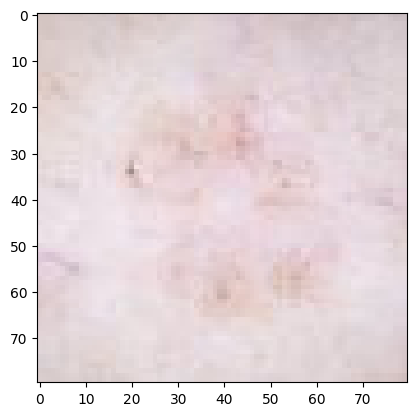

In [76]:
from keras.utils import load_img
from keras.utils import img_to_array
from pylab import *
import os
url = '/content/drive/MyDrive/Final_Project/Test'
for i in listdir(url):
  if os.path.isfile(os.path.join(url, i)) and i.lower().endswith(('.jpg', '.jpeg', '.png')):
    img = load_img(url + '/' + i, target_size = (80,80))
    imshow(img)
    img = img_to_array(img)
    img = img.reshape(1,80,80,3)
    img = img.astype('float32')
    a = model.predict(img).argmax()
    class_name = ['Di ung',
                    'Ezema',
                    'Mun coc','Nam da',
                    'Sui mao', 'Ung thu da', 'Vay nen']
    print(class_name[a])
    plt.show()